<a href="https://colab.research.google.com/github/AlisonJD/RTACourse/blob/main/New_York_City_Taxi_Trip_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

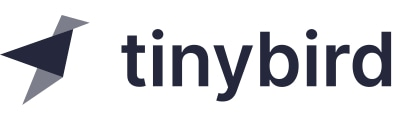
#Principles of Real-Time Analytics Course

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [ ]:
def write_text_to_file(filename, text):
  with open(filename, 'w') as f:
      f.write(text)

In [2]:
!pip install tinybird-cli -qq

     |████████████████████████████████| 71 kB 4.8 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 61 kB 9.5 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 81 kB 11.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!tb auth

Copy the admin token from https://ui.tinybird.co/tokens and paste it here: 
** Auth successful! 
** Configuration written to .tinyb file, consider adding it to .gitignore


In this notebook we create these assets:

|Asset            | Activity      |
| ----------------- |:-------------:|
| taxi.datasource|create|
|taxi__zone_lookup.datasource|create|

#New York City Taxi Trip Datasets

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Here we create a datasource of yellow taxi trips in 2019 and a lookup datasource of locations.

In [ ]:
!tb datasource generate https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv

** Generated datasources/yellow_tripdata_2019_01.datasource
** => Create it on the server running: $ tb push datasources/yellow_tripdata_2019_01.datasource
** => Append data using: $ tb datasource append yellow_tripdata_2019-01 https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv`



In [ ]:
!mv datasources/yellow_tripdata_2019_01.datasource datasources/taxi.datasource

In [ ]:
filename="datasources/taxi.datasource"
text='''
DESCRIPTION amending schema that would be automatically generated
SCHEMA >
    `vendorid` Int16,
    `tpep_pickup_datetime` DateTime,
    `tpep_dropoff_datetime` DateTime,
    `passenger_count` Nullable(Int16),
    `trip_distance` Float32,
    `ratecodeid` Nullable(Int16),
    `store_and_fwd_flag` String,
    `pulocationid` Int32,
    `dolocationid` Int32,
    `payment_type` Nullable(Int16),
    `fare_amount` Float32,
    `extra` Float32,
    `mta_tax` Float32,
    `tip_amount` Float32,
    `tolls_amount` Float32,
    `improvement_surcharge` Float32,
    `total_amount` Float32,
    `congestion_surcharge` Nullable(Float32)

ENGINE "MergeTree"
ENGINE_PARTITION_KEY "toMonth(tpep_pickup_datetime)"
ENGINE_SORTING_KEY "tpep_pickup_datetime"
'''

write_text_to_file(filename, text)

In [ ]:
!tb push datasources/taxi.datasource

** Processing datasources/taxi.datasource
** Building dependencies
** Running taxi 
** 'taxi' created
** Not pushing fixtures


In [ ]:
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv

** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 7667792
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi


In [ ]:
!tb sql "SELECT count() FROM taxi"

-----------
| count() |
-----------
| 7667792 |
-----------


In [ ]:
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-02.csv

** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 14687167
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi


In [ ]:
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-03.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv

** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 22519712
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi
** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 29952851
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi


In [ ]:
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-05.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-06.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-07.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-08.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-09.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-10.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-11.csv
!tb datasource append taxi https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-12.csv

** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 37518112
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi
** 🥚 starting import process
** 🐥 done
** Total rows in taxi: 44459136
** Data appended to data source 'taxi' successfully!
** Data pushed to taxi
** 🥚 starting import process

** There was an error with file contents: 33959 rows in quarantine.
** 🥚 starting import process

** There was an error with file contents: 33321 rows in quarantine.
** 🥚 starting import process

** There was an error with file contents: 34089 rows in quarantine.
** 🥚 starting import process

** There was an error with file contents: 46723 rows in quarantine.
** 🥚 starting import process

** There was an error with file contents: 47491 rows in quarantine.
** 🥚 starting import process

** There was an error with file contents: 51018 rows in quarantine.


Note that there are null values in `vendorid` from 2019-07 onwards; these rows are put into a quarantine table.

In [ ]:
!tb sql "SELECT count() FROM taxi"

------------
|  count() |
------------
| 84152418 |
------------


In [ ]:
!tb datasource generate https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv 

** Generated datasources/taxi__zone_lookup.datasource
** => Create it on the server running: $ tb push datasources/taxi__zone_lookup.datasource
** => Append data using: $ tb datasource append taxi+_zone_lookup https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv`



In [ ]:
filename="datasources/taxi__zone_lookup.datasource"
text='''
DESCRIPTION join engine added to the generated datasource
SCHEMA >
    `locationid` Int32,
    `borough` String,
    `zone` String,
    `service_zone` String

ENGINE "Join"
ENGINE_JOIN_STRICTNESS "ANY"
ENGINE_JOIN_TYPE "LEFT"
ENGINE_KEY_COLUMNS "locationid"
'''

write_text_to_file(filename, text)

In [ ]:
!tb push ./datasources/taxi__zone_lookup.datasource

** Processing ./datasources/taxi__zone_lookup.datasource
** Building dependencies
** Running taxi__zone_lookup 
** 'taxi__zone_lookup' created
** Not pushing fixtures


In [ ]:
!tb datasource append taxi__zone_lookup https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv

** 🥚 starting import process
** 🐥 done
** Total rows in taxi__zone_lookup: None
** Data appended to data source 'taxi__zone_lookup' successfully!
** Data pushed to taxi__zone_lookup


In [3]:
!tb sql --stats "SELECT * FROM taxi LIMIT 1"

** Query took 0.012925058 seconds
** Rows read: 1
** Bytes read: 74 bytes
------------------------------------------
vendorid: 2
tpep_pickup_datetime: 2003-01-01 00:05:12
tpep_dropoff_datetime: 2003-01-01 00:05:12
passenger_count: 1
trip_distance: 0
ratecodeid: 1
store_and_fwd_flag: N
pulocationid: 264
dolocationid: 193
payment_type: 2
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: None
------------------------------------------


In [4]:
!tb sql --rows_limit 1 --stats "SELECT * FROM taxi"

** Query took 0.006178502 seconds
** Rows read: 208
** Bytes read: 15.39 KB
------------------------------------------
vendorid: 2
tpep_pickup_datetime: 2019-03-01 05:01:25
tpep_dropoff_datetime: 2019-03-01 05:05:37
passenger_count: 2
trip_distance: 0.71
ratecodeid: 1
store_and_fwd_flag: N
pulocationid: 138
dolocationid: 223
payment_type: 2
fare_amount: 5
extra: 0.5
mta_tax: 0.5
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0.3
total_amount: 6.3
congestion_surcharge: 0
------------------------------------------


In [8]:
!tb sql --stats "SELECT * FROM taxi__zone_lookup LIMIT 1"

** Query took 0.000183606 seconds
** Rows read: 1
** Bytes read: 55 bytes
---------------------------------------------------
| locationid | borough | zone      | service_zone |
---------------------------------------------------
|        198 | Queens  | Ridgewood | Boro Zone    |
---------------------------------------------------


In [7]:
!tb sql --rows_limit 1 --stats "SELECT * FROM taxi__zone_lookup"

** Query took 0.000178043 seconds
** Rows read: 265
** Bytes read: 16.89 KB
---------------------------------------------------
| locationid | borough | zone      | service_zone |
---------------------------------------------------
|        198 | Queens  | Ridgewood | Boro Zone    |
---------------------------------------------------
